In [ ]:
import pandas as pd
import numpy as np
from fbprophet import Prophet
import matplotlib.pyplot as plt
import statsmodels.api as sm
from pylab import rcParams
import warnings
warnings.filterwarnings('ignore')

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning:

pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.



#Data Exploration

In [ ]:
df = pd.read_csv('sales_dataset.csv')
df.head(24)

,Month,Sales
0,1984-01,2815
1,1984-02,2672
2,1984-03,2755
3,1984-04,2721
4,1984-05,2946
5,1984-06,3036
6,1984-07,2282
7,1984-08,2212
8,1984-09,2922
9,1984-10,4301


In [ ]:
df['Month']= pd.to_datetime(df['Month'])

In [ ]:
train = df[:96]
test  = df[-9:]

In [ ]:
print(f'Shape of train set: {train.shape} \nShape of test set:  {test.shape}')

Shape of train set: (96, 2) 
Shape of test set:  (9, 2)


In [ ]:
train.isna().sum()

Month    0
Sales    0
dtype: int64

In [ ]:
test.isna().sum()

Month    0
Sales    0
dtype: int64

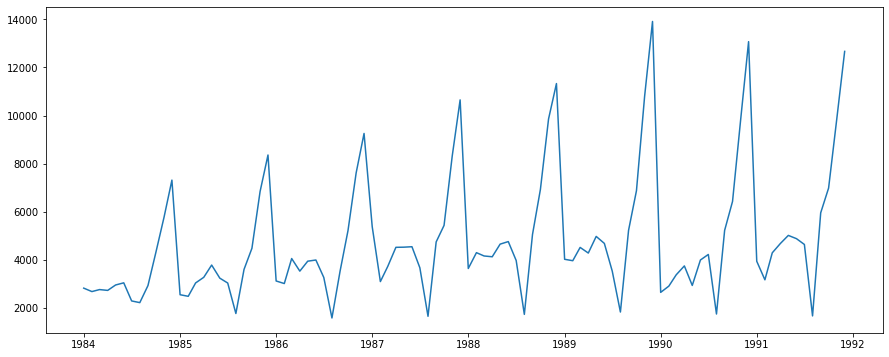

In [ ]:
plt.figure(figsize=(15,6))
plt.plot(train.Month, train.Sales)
plt.show()

In [ ]:
train.index = train.Month

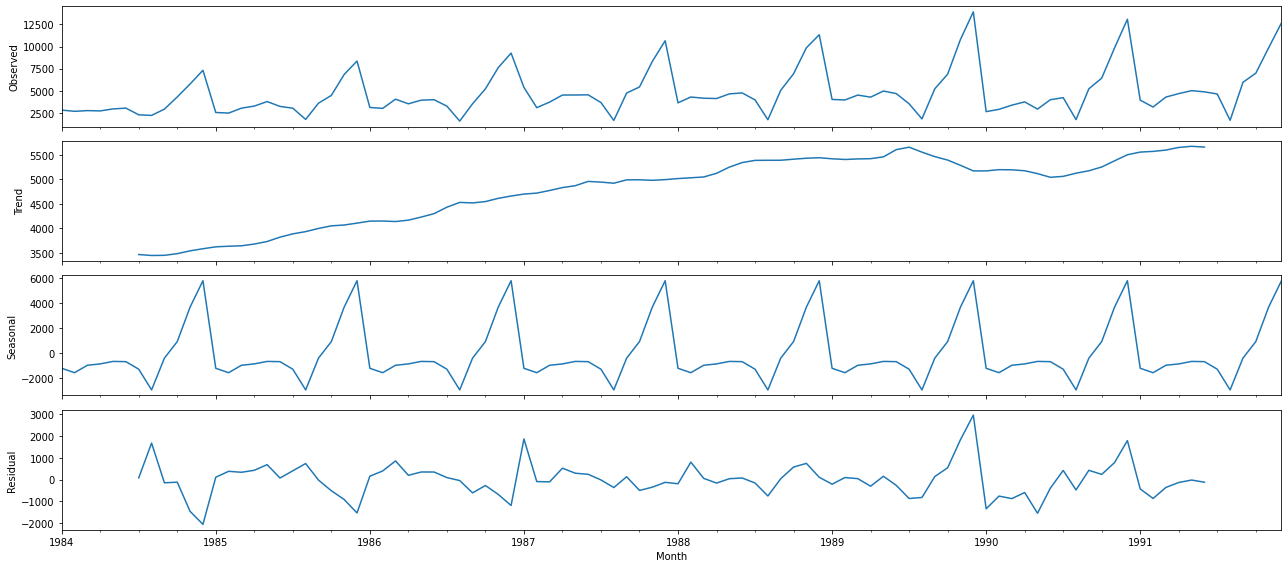

In [ ]:
rcParams['figure.figsize'] = 18, 8
decomposition = sm.tsa.seasonal_decompose(train.Sales, model='additive')
fig = decomposition.plot()
plt.show()

In [ ]:
df

,Month,Sales
0,1984-01-01,2815
1,1984-02-01,2672
2,1984-03-01,2755
3,1984-04-01,2721
4,1984-05-01,2946
...,...,...
100,1992-05-01,4618
101,1992-06-01,5312
102,1992-07-01,4298
103,1992-08-01,1413


In [ ]:
df_new = df.rename(columns={'Month':'ds', 'Sales':'y'})
df_new.head()

,ds,y
0,1984-01-01,2815
1,1984-02-01,2672
2,1984-03-01,2755
3,1984-04-01,2721
4,1984-05-01,2946


In [ ]:
train_new = df_new[:96]
test_new  = df_new[-9:]

#First Model

In [ ]:
m = Prophet()
m.fit(train_new)

INFO:numexpr.utils:NumExpr defaulting to 2 threads.
INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [ ]:
future = m.make_future_dataframe(periods=9, freq='MS')
future

,ds
0,1984-01-01
1,1984-02-01
2,1984-03-01
3,1984-04-01
4,1984-05-01
...,...
100,1992-05-01
101,1992-06-01
102,1992-07-01
103,1992-08-01


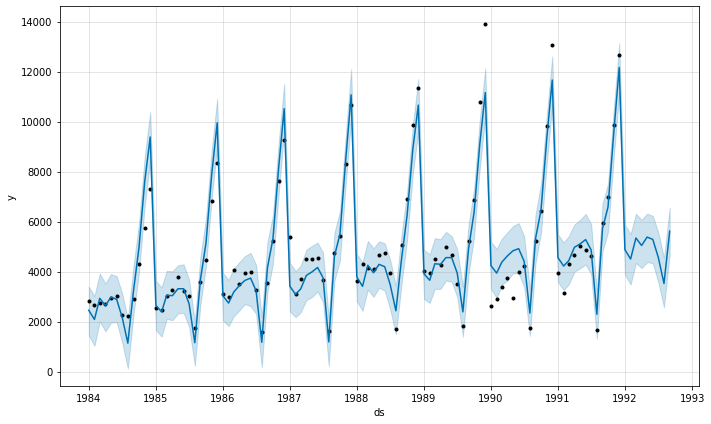

In [ ]:
forecasts = m.predict(future)
fig = m.plot(forecasts)

In [ ]:
forecasts

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,1984-01-01,3592.199594,1454.715959,3400.917916,3592.199594,3592.199594,-1135.122647,-1135.122647,-1135.122647,-1135.122647,-1135.122647,-1135.122647,0.0,0.0,0.0,2457.076947
1,1984-02-01,3620.728222,1035.717805,3026.057815,3620.728222,3620.728222,-1531.625323,-1531.625323,-1531.625323,-1531.625323,-1531.625323,-1531.625323,0.0,0.0,0.0,2089.102898
2,1984-03-01,3647.416292,2011.460366,3931.501050,3647.416292,3647.416292,-713.422893,-713.422893,-713.422893,-713.422893,-713.422893,-713.422893,0.0,0.0,0.0,2933.993400
3,1984-04-01,3675.944920,1613.397627,3523.712006,3675.944920,3675.944920,-1035.108937,-1035.108937,-1035.108937,-1035.108937,-1035.108937,-1035.108937,0.0,0.0,0.0,2640.835983
4,1984-05-01,3703.553267,1960.822673,3904.333063,3703.553267,3703.553267,-721.472107,-721.472107,-721.472107,-721.472107,-721.472107,-721.472107,0.0,0.0,0.0,2982.081160
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
100,1992-05-01,6103.657829,4386.280953,6320.662863,6102.572997,6104.718786,-721.472107,-721.472107,-721.472107,-721.472107,-721.472107,-721.472107,0.0,0.0,0.0,5382.185722
101,1992-06-01,6126.755154,4334.578851,6231.402725,6125.215672,6128.149274,-838.470633,-838.470633,-838.470633,-838.470633,-838.470633,-838.470633,0.0,0.0,0.0,5288.284521
102,1992-07-01,6149.107404,3573.259758,5568.394300,6147.085081,6150.881427,-1582.553439,-1582.553439,-1582.553439,-1582.553439,-1582.553439,-1582.553439,0.0,0.0,0.0,4566.553965
103,1992-08-01,6172.204730,2569.903388,4551.731207,6169.723902,6174.384940,-2647.175183,-2647.175183,-2647.175183,-2647.175183,-2647.175183,-2647.175183,0.0,0.0,0.0,3525.029547


In [ ]:
from fbprophet.plot import plot_plotly, plot_components_plotly

plot_plotly(m, forecasts)

In [ ]:
plot_components_plotly(m, forecasts)

In [ ]:
forecasts.yhat[:96]

0      2457.076947
1      2089.102898
2      2933.993400
3      2640.835983
4      2982.081160
          ...     
91     2295.697044
92     5726.277832
93     6586.046642
94     9530.234864
95    12164.481717
Name: yhat, Length: 96, dtype: float64

In [ ]:
df.Sales[:96]

0      2815
1      2672
2      2755
3      2721
4      2946
      ...  
91     1659
92     5951
93     6981
94     9851
95    12670
Name: Sales, Length: 96, dtype: int64

In [ ]:
def mape(actual,forecast):
  return np.mean(np.abs((actual-forecast)/actual))*100

In [ ]:
mape(df.Sales[:96],forecasts.yhat[:96])

12.892491995685937

In [ ]:
mape(df.Sales[-9:],forecasts.yhat[-9:])

26.435194343071334

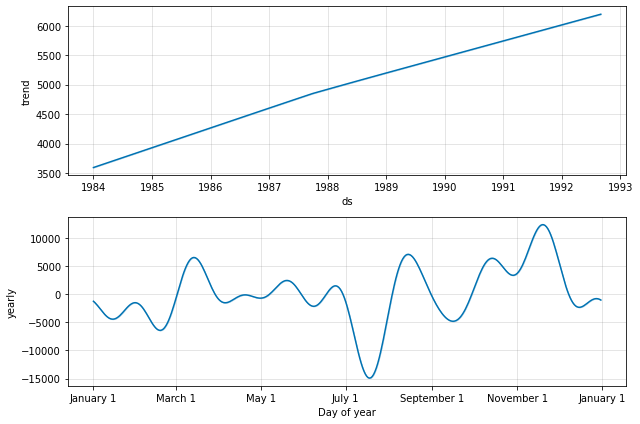

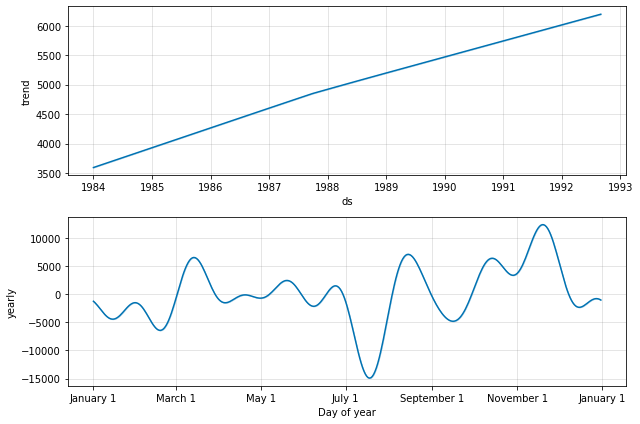

In [ ]:
m.plot_components(forecasts)

# Parameter Tuning

In [ ]:
prophet = Prophet(
interval_width = 0.95,
yearly_seasonality = True,
weekly_seasonality = True,
daily_seasonality = True,
holidays = None,
changepoint_prior_scale = 0.05
)
prophet.fit(train_new)
forecast = prophet.predict(future)

In [ ]:
mape(df.Sales[:96],forecast.yhat[:96])

12.572731324874539

In [ ]:
mape(df.Sales[-9:],forecast.yhat[-9:])

30.937900707485465

In [ ]:
prophet = Prophet(
interval_width = 0.95,
yearly_seasonality = True,
weekly_seasonality = True,
daily_seasonality = True,
holidays = None,
changepoint_prior_scale = 0.05
)
prophet.fit(train_new)
forecast = prophet.predict(future)
print(f'Train mape: {mape(df.Sales[:96],forecast.yhat[:96])}, \nTest mape:  {mape(df.Sales[-9:],forecast.yhat[-9:])}')

Train mape: 12.572731324874539, 
Test mape:  30.937900707485465


In [ ]:
prophet = Prophet(
interval_width = 0.90,
yearly_seasonality = True,
weekly_seasonality = True,
daily_seasonality = True,
holidays = None,
changepoint_prior_scale = 0.05
)
prophet.fit(train_new)
forecast = prophet.predict(future)
print(f'Train mape: {mape(df.Sales[:96],forecast.yhat[:96])}, \nTest mape:  {mape(df.Sales[-9:],forecast.yhat[-9:])}')

Train mape: 12.572731324874539, 
Test mape:  30.937900707485465


In [ ]:
prophet = Prophet(
interval_width = 0.85,
yearly_seasonality = True,
weekly_seasonality = True,
daily_seasonality = True,
holidays = None,
changepoint_prior_scale = 0.05
)
prophet.fit(train_new)
forecast = prophet.predict(future)
print(f'Train mape: {mape(df.Sales[:96],forecast.yhat[:96])}, \nTest mape:  {mape(df.Sales[-9:],forecast.yhat[-9:])}')

Train mape: 12.572731324874539, 
Test mape:  30.937900707485465


In [ ]:
prophet = Prophet(
interval_width = 0.80,
yearly_seasonality = True,
weekly_seasonality = True,
daily_seasonality = True,
holidays = None,
changepoint_prior_scale = 0.05
)
prophet.fit(train_new)
forecast = prophet.predict(future)
print(f'Train mape: {mape(df.Sales[:96],forecast.yhat[:96])}, \nTest mape:  {mape(df.Sales[-9:],forecast.yhat[-9:])}')

Train mape: 12.572731324874539, 
Test mape:  30.937900707485465


In [ ]:
prophet = Prophet(
interval_width = 0.75,
yearly_seasonality = True,
weekly_seasonality = True,
daily_seasonality = True,
holidays = None,
changepoint_prior_scale = 0.05
)
prophet.fit(train_new)
forecast = prophet.predict(future)
print(f'Train mape: {mape(df.Sales[:96],forecast.yhat[:96])}, \nTest mape:  {mape(df.Sales[-9:],forecast.yhat[-9:])}')

Train mape: 12.572731324874539, 
Test mape:  30.937900707485465


In [ ]:
prophet = Prophet(
interval_width = 0.70,
yearly_seasonality = True,
weekly_seasonality = True,
daily_seasonality = True,
holidays = None,
changepoint_prior_scale = 0.05
)
prophet.fit(train_new)
forecast = prophet.predict(future)
print(f'Train mape: {mape(df.Sales[:96],forecast.yhat[:96])}, \nTest mape:  {mape(df.Sales[-9:],forecast.yhat[-9:])}')

Train mape: 12.572731324874539, 
Test mape:  30.937900707485465


In [ ]:
prophet = Prophet(
interval_width = 0.65,
yearly_seasonality = True,
weekly_seasonality = True,
daily_seasonality = True,
holidays = None,
changepoint_prior_scale = 0.05
)
prophet.fit(train_new)
forecast = prophet.predict(future)
print(f'Train mape: {mape(df.Sales[:96],forecast.yhat[:96])}, \nTest mape:  {mape(df.Sales[-9:],forecast.yhat[-9:])}')

Train mape: 12.572731324874539, 
Test mape:  30.937900707485465


In [ ]:
prophet = Prophet(
interval_width = 0.1,
yearly_seasonality = True,
weekly_seasonality = True,
daily_seasonality = True,
holidays = None,
changepoint_prior_scale = 0.05
)
prophet.fit(train_new)
forecast = prophet.predict(future)
print(f'Train mape: {mape(df.Sales[:96],forecast.yhat[:96])}, \nTest mape:  {mape(df.Sales[-9:],forecast.yhat[-9:])}')

Train mape: 12.572731324874539, 
Test mape:  30.937900707485465


In [ ]:
prophet = Prophet(
interval_width = 0.95,
yearly_seasonality = True,
weekly_seasonality = True,
daily_seasonality = True,
holidays = None,
changepoint_prior_scale = 0.01
)
prophet.fit(train_new)
forecast = prophet.predict(future)
print(f'Train mape: {mape(df.Sales[:96],forecast.yhat[:96])}, \nTest mape:  {mape(df.Sales[-9:],forecast.yhat[-9:])}')

Train mape: 12.680047225004893, 
Test mape:  33.29714727439883


In [ ]:
prophet = Prophet(
interval_width = 0.95,
yearly_seasonality = True,
weekly_seasonality = True,
daily_seasonality = True,
holidays = None,
changepoint_prior_scale = 0.1
)
prophet.fit(train_new)
forecast = prophet.predict(future)
print(f'Train mape: {mape(df.Sales[:96],forecast.yhat[:96])}, \nTest mape:  {mape(df.Sales[-9:],forecast.yhat[-9:])}')

Train mape: 12.496964649856226, 
Test mape:  29.58021201145284


In [ ]:
prophet = Prophet(
interval_width = 0.95,
yearly_seasonality = True,
weekly_seasonality = True,
daily_seasonality = True,
holidays = None,
changepoint_prior_scale = 0.15
)
prophet.fit(train_new)
forecast = prophet.predict(future)
print(f'Train mape: {mape(df.Sales[:96],forecast.yhat[:96])}, \nTest mape:  {mape(df.Sales[-9:],forecast.yhat[-9:])}')

Train mape: 12.518601471927896, 
Test mape:  27.930587251878848


In [ ]:
prophet = Prophet(
interval_width = 0.95,
yearly_seasonality = True,
weekly_seasonality = True,
daily_seasonality = True,
holidays = None,
changepoint_prior_scale = 0.20
)
prophet.fit(train_new)
forecast = prophet.predict(future)
print(f'Train mape: {mape(df.Sales[:96],forecast.yhat[:96])}, \nTest mape:  {mape(df.Sales[-9:],forecast.yhat[-9:])}')

Train mape: 12.326873579931572, 
Test mape:  29.827036793172944


In [ ]:
for scale in np.arange(0.1,0.16,0.01):
  prophet = Prophet(
  interval_width = 0.95,
  yearly_seasonality = True,
  weekly_seasonality = True,
  daily_seasonality = True,
  holidays = None,
  changepoint_prior_scale = scale
  )
  prophet.fit(train_new)
  forecast = prophet.predict(future)
  print(f'Scale:{scale} \nTrain mape: {mape(df.Sales[:96],forecast.yhat[:96])}, \nTest mape:  {mape(df.Sales[-9:],forecast.yhat[-9:])}')

Scale:0.1 
Train mape: 12.496964649856226, 
Test mape:  29.58021201145284
Scale:0.11 
Train mape: 12.532530077881662, 
Test mape:  28.460732234399106
Scale:0.12 
Train mape: 12.501829950185146, 
Test mape:  28.961624549805386
Scale:0.13 
Train mape: 12.503371090804741, 
Test mape:  28.633318328420614
Scale:0.13999999999999999 
Train mape: 12.511063726828993, 
Test mape:  28.017903375554127
Scale:0.14999999999999997 
Train mape: 12.51860236163892, 
Test mape:  27.930602330616562


In [ ]:
prophet = Prophet(
interval_width = 0.95,
yearly_seasonality = True,
weekly_seasonality = True,
daily_seasonality = False,
holidays = None,
changepoint_prior_scale = 0.15
)
prophet.fit(train_new)
forecast = prophet.predict(future)
print(f'Train mape: {mape(df.Sales[:96],forecast.yhat[:96])}, \nTest mape:  {mape(df.Sales[-9:],forecast.yhat[-9:])}')

Train mape: 12.512582822627442, 
Test mape:  27.923184515797388


In [ ]:
prophet = Prophet(
interval_width = 0.95,
yearly_seasonality = True,
weekly_seasonality = False,
daily_seasonality = False,
holidays = None,
changepoint_prior_scale = 0.15
)
prophet.fit(train_new)
forecast = prophet.predict(future)
print(f'Train mape: {mape(df.Sales[:96],forecast.yhat[:96])}, \nTest mape:  {mape(df.Sales[-9:],forecast.yhat[-9:])}')

Train mape: 12.650592373892017, 
Test mape:  21.705720089512255


In [ ]:
for scale in np.arange(0.1,0.16,0.01):
  prophet = Prophet(
  interval_width = 0.95,
  yearly_seasonality = True,
  weekly_seasonality = False,
  daily_seasonality = False,
  holidays = None,
  changepoint_prior_scale = scale
  )
  prophet.fit(train_new)
  forecast = prophet.predict(future)
  print(f'Scale:{scale} \nTrain mape: {mape(df.Sales[:96],forecast.yhat[:96])}, \nTest mape:  {mape(df.Sales[-9:],forecast.yhat[-9:])}')

Scale:0.1 
Train mape: 12.662196012522708, 
Test mape:  23.19116533568048
Scale:0.11 
Train mape: 12.649854166637118, 
Test mape:  22.688347367036485
Scale:0.12 
Train mape: 12.64601524638185, 
Test mape:  22.11596087602608
Scale:0.13 
Train mape: 12.646253223633591, 
Test mape:  22.26988423582947
Scale:0.13999999999999999 
Train mape: 12.62773354551919, 
Test mape:  22.47353236326104
Scale:0.14999999999999997 
Train mape: 12.650592381674674, 
Test mape:  21.705720015687856


In [ ]:
for scale in np.arange(0.15,0.21,0.01):
  prophet = Prophet(
  interval_width = 0.95,
  yearly_seasonality = True,
  weekly_seasonality = False,
  daily_seasonality = False,
  holidays = None,
  changepoint_prior_scale = scale
  )
  prophet.fit(train_new)
  forecast = prophet.predict(future)
  print(f'Scale:{scale} \nTrain mape: {mape(df.Sales[:96],forecast.yhat[:96])}, \nTest mape:  {mape(df.Sales[-9:],forecast.yhat[-9:])}')

Scale:0.15 
Train mape: 12.650592373892017, 
Test mape:  21.705720089512255
Scale:0.16 
Train mape: 12.630491941759647, 
Test mape:  21.818412102232756
Scale:0.17 
Train mape: 12.646003749079496, 
Test mape:  21.500405669339536
Scale:0.18000000000000002 
Train mape: 12.62767166214436, 
Test mape:  21.65366691338326
Scale:0.19000000000000003 
Train mape: 12.509686860177816, 
Test mape:  22.73571498601621
Scale:0.20000000000000004 
Train mape: 12.459632125366214, 
Test mape:  23.23434140721199


In [ ]:
for width in np.arange(0.05,1.05,0.05):
  prophet = Prophet(
  interval_width = 0.95,
  yearly_seasonality = True,
  weekly_seasonality = False,
  daily_seasonality = False,
  holidays = None,
  changepoint_prior_scale = 0.17
  )
  prophet.fit(train_new)
  forecast = prophet.predict(future)
  print(f'Interval width: {width} \nTrain mape: {mape(df.Sales[:96],forecast.yhat[:96])}, \nTest mape:  {mape(df.Sales[-9:],forecast.yhat[-9:])}')

Interval width: 0.05 
Train mape: 12.646003749079496, 
Test mape:  21.500405669339536
Interval width: 0.1 
Train mape: 12.646003749079496, 
Test mape:  21.500405669339536
Interval width: 0.15000000000000002 
Train mape: 12.646003749079496, 
Test mape:  21.500405669339536
Interval width: 0.2 
Train mape: 12.646003749079496, 
Test mape:  21.500405669339536
Interval width: 0.25 
Train mape: 12.646003749079496, 
Test mape:  21.500405669339536
Interval width: 0.3 
Train mape: 12.646003749079496, 
Test mape:  21.500405669339536
Interval width: 0.35000000000000003 
Train mape: 12.646003749079496, 
Test mape:  21.500405669339536
Interval width: 0.4 
Train mape: 12.646003749079496, 
Test mape:  21.500405669339536
Interval width: 0.45 
Train mape: 12.646003749079496, 
Test mape:  21.500405669339536
Interval width: 0.5 
Train mape: 12.646003749079496, 
Test mape:  21.500405669339536
Interval width: 0.55 
Train mape: 12.646003749079496, 
Test mape:  21.500405669339536
Interval width: 0.60000000000

## The Promising One

In [ ]:
prophet = Prophet(
interval_width = 0.95,
yearly_seasonality = True,
weekly_seasonality = False,
daily_seasonality = False,
holidays = None,
changepoint_prior_scale = 0.17
)
prophet.fit(train_new)
forecast = prophet.predict(future)
print(f'Train mape: {mape(df.Sales[:96],forecast.yhat[:96])}, \nTest mape:  {mape(df.Sales[-9:],forecast.yhat[-9:])}')

Train mape: 12.646003749079496, 
Test mape:  21.500405669339536


In [ ]:
mape(df_new.y, forecast.yhat)

13.404952485101784

In [ ]:
train_new

,ds,y
0,1984-01-01,2815
1,1984-02-01,2672
2,1984-03-01,2755
3,1984-04-01,2721
4,1984-05-01,2946
...,...,...
91,1991-08-01,1659
92,1991-09-01,5951
93,1991-10-01,6981
94,1991-11-01,9851


In [ ]:
for point in range(1,100,10):
  prophet1 = Prophet(
      growth = 'linear',
      n_changepoints = point,
      interval_width = 0.95,
      yearly_seasonality = True,
      weekly_seasonality = False,
      daily_seasonality = False,
      holidays = None,
      changepoint_prior_scale = 0.17
  )
  prophet1.fit(train_new)
  forecast1 = prophet1.predict(future)
  print(f'Change points: {point} \nTrain mape: {mape(df.Sales[:96],forecast1.yhat[:96])}, \nTest mape:  {mape(df.Sales[-9:],forecast1.yhat[-9:])}')
  print('='*20)

Change points: 1 
Train mape: 13.069803926506331, 
Test mape:  28.035096957498006
Change points: 11 
Train mape: 12.644189058463343, 
Test mape:  21.634954979515253
Change points: 21 
Train mape: 12.637675271005092, 
Test mape:  21.73708032768329
Change points: 31 
Train mape: 12.620958697882683, 
Test mape:  21.881490129290803
Change points: 41 
Train mape: 12.653408008608585, 
Test mape:  21.741019068227065
Change points: 51 
Train mape: 12.640589337050292, 
Test mape:  21.52338327626432
Change points: 61 
Train mape: 12.621895464687455, 
Test mape:  21.894828759508425


INFO:fbprophet:n_changepoints greater than number of observations. Using 75.


Change points: 71 
Train mape: 12.63330468122279, 
Test mape:  21.518841661152198


INFO:fbprophet:n_changepoints greater than number of observations. Using 75.


Change points: 81 
Train mape: 12.630682311310698, 
Test mape:  21.636756476238258
Change points: 91 
Train mape: 12.630682311310698, 
Test mape:  21.636756476238258


In [ ]:
for point in range(50,56,1):
  prophet1 = Prophet(
      growth = 'linear',
      n_changepoints = point,
      interval_width = 0.95,
      yearly_seasonality = True,
      weekly_seasonality = False,
      daily_seasonality = False,
      holidays = None,
      changepoint_prior_scale = 0.17
  )
  prophet1.fit(train_new)
  forecast1 = prophet1.predict(future)
  print(f'Change points: {point} \nTrain mape: {mape(df.Sales[:96],forecast1.yhat[:96])}, \nTest mape:  {mape(df.Sales[-9:],forecast1.yhat[-9:])}')
  print('='*30)

Change points: 50 
Train mape: 12.61818809728644, 
Test mape:  22.009967301518557
Change points: 51 
Train mape: 12.640589337050292, 
Test mape:  21.52338327626432
Change points: 52 
Train mape: 12.63314812486077, 
Test mape:  21.681428154585436
Change points: 53 
Train mape: 12.629034200158145, 
Test mape:  21.76572265287293
Change points: 54 
Train mape: 12.62264830999198, 
Test mape:  21.87917035005846
Change points: 55 
Train mape: 12.637785229339633, 
Test mape:  21.559044039634603


In [ ]:
Prophet()

In [ ]:
for range in np.arange(0.1,1,0.1):
  prophet = Prophet(
  changepoint_range = range,
  interval_width = 0.95,
  yearly_seasonality = True,
  weekly_seasonality = False,
  daily_seasonality = False,
  holidays = None,
  changepoint_prior_scale = 0.17
  )
  prophet.fit(train_new)
  forecast = prophet.predict(future)
  print(f'Change Point Range: {range} \nTrain mape: {mape(df.Sales[:96],forecast.yhat[:96])}, \nTest mape:  {mape(df.Sales[-9:],forecast.yhat[-9:])}')
  print('='*30)

INFO:fbprophet:n_changepoints greater than number of observations. Using 8.
INFO:fbprophet:n_changepoints greater than number of observations. Using 18.


Change Point Range: 0.1 
Train mape: 13.069661227662815, 
Test mape:  28.034319636533784
Change Point Range: 0.2 
Train mape: 13.074029498509748, 
Test mape:  28.053098525446952
Change Point Range: 0.30000000000000004 
Train mape: 12.8756545848054, 
Test mape:  26.685679541188485
Change Point Range: 0.4 
Train mape: 12.756095983624718, 
Test mape:  24.716192578922136
Change Point Range: 0.5 
Train mape: 12.650044592096146, 
Test mape:  22.92930363211303
Change Point Range: 0.6 
Train mape: 12.62748656602453, 
Test mape:  21.668012142222082
Change Point Range: 0.7000000000000001 
Train mape: 12.642675069500054, 
Test mape:  21.689767339976417
Change Point Range: 0.8 
Train mape: 12.646003749079496, 
Test mape:  21.500405669339536
Change Point Range: 0.9 
Train mape: 12.631863771203955, 
Test mape:  21.74382375134487


In [ ]:
for range in np.arange(0.75,0.86,0.01):
  prophet = Prophet(
  changepoint_range = range,
  interval_width = 0.95,
  yearly_seasonality = True,
  weekly_seasonality = False,
  daily_seasonality = False,
  holidays = None,
  changepoint_prior_scale = 0.17
  )
  prophet.fit(train_new)
  forecast = prophet.predict(future)
  print(f'Change Point Range: {range} \nTrain mape: {mape(df.Sales[:96],forecast.yhat[:96])}, \nTest mape:  {mape(df.Sales[-9:],forecast.yhat[-9:])}')
  print('='*30)

Change Point Range: 0.75 
Train mape: 12.640099204175451, 
Test mape:  22.1074445437215
Change Point Range: 0.76 
Train mape: 12.640099204175451, 
Test mape:  22.1074445437215
Change Point Range: 0.77 
Train mape: 12.649307106356513, 
Test mape:  21.55121638125713
Change Point Range: 0.78 
Train mape: 12.624049750172054, 
Test mape:  21.870374842911954
Change Point Range: 0.79 
Train mape: 12.636750544015227, 
Test mape:  21.501812683060535
Change Point Range: 0.8 
Train mape: 12.646003749079496, 
Test mape:  21.500405669339536
Change Point Range: 0.81 
Train mape: 12.616671210835188, 
Test mape:  22.018656478776503
Change Point Range: 0.8200000000000001 
Train mape: 12.607508089814653, 
Test mape:  21.96876577552316
Change Point Range: 0.8300000000000001 
Train mape: 12.622601719031984, 
Test mape:  21.902996908889175
Change Point Range: 0.8400000000000001 
Train mape: 12.604673814619874, 
Test mape:  21.971558926232277
Change Point Range: 0.8500000000000001 
Train mape: 12.6383783179

In [ ]:
for scale in np.arange(10,91,10):
  prophet = Prophet(
  seasonality_prior_scale = scale,
  interval_width = 0.95,
  yearly_seasonality = True,
  weekly_seasonality = False,
  daily_seasonality = False,
  holidays = None,
  changepoint_prior_scale = 0.17
  )
  prophet.fit(train_new)
  forecast = prophet.predict(future)
  print(f'Seasonality Prior Scale: {scale} \nTrain mape: {mape(df.Sales[:96],forecast.yhat[:96])}, \nTest mape:  {mape(df.Sales[-9:],forecast.yhat[-9:])}')
  print('='*30)

Seasonality Prior Scale: 10 
Train mape: 12.646003749079496, 
Test mape:  21.500405669339536
Seasonality Prior Scale: 20 
Train mape: 12.633587175691789, 
Test mape:  21.663529276404685
Seasonality Prior Scale: 30 
Train mape: 12.630578542537792, 
Test mape:  21.735198147499982
Seasonality Prior Scale: 40 
Train mape: 12.647337512596454, 
Test mape:  21.44867728798653
Seasonality Prior Scale: 50 
Train mape: 12.644237237020953, 
Test mape:  21.541455882294294
Seasonality Prior Scale: 60 
Train mape: 12.619605997582841, 
Test mape:  22.2226581834541
Seasonality Prior Scale: 70 
Train mape: 12.641549684278239, 
Test mape:  21.85990726141745
Seasonality Prior Scale: 80 
Train mape: 12.630034354002731, 
Test mape:  21.737497386782024
Seasonality Prior Scale: 90 
Train mape: 12.632601412527148, 
Test mape:  21.753625018214322


In [ ]:
for scale in np.arange(35,55,1):
  prophet = Prophet(
  seasonality_prior_scale = scale,
  interval_width = 0.95,
  yearly_seasonality = True,
  weekly_seasonality = False,
  daily_seasonality = False,
  holidays = None,
  changepoint_prior_scale = 0.17
  )
  prophet.fit(train_new)
  forecast = prophet.predict(future)
  print(f'Seasonality Prior Scale: {scale} \nTrain mape: {mape(df.Sales[:96],forecast.yhat[:96])}, \nTest mape:  {mape(df.Sales[-9:],forecast.yhat[-9:])}')
  print('='*30)

Seasonality Prior Scale: 35 
Train mape: 12.631358768252413, 
Test mape:  21.64155206451149
Seasonality Prior Scale: 36 
Train mape: 12.630962097718292, 
Test mape:  21.732877550075635
Seasonality Prior Scale: 37 
Train mape: 12.657210368867, 
Test mape:  21.539206967608962
Seasonality Prior Scale: 38 
Train mape: 12.63544659128126, 
Test mape:  21.762899180734628
Seasonality Prior Scale: 39 
Train mape: 12.651836718024686, 
Test mape:  21.484389874070324
Seasonality Prior Scale: 40 
Train mape: 12.647337512596454, 
Test mape:  21.44867728798653
Seasonality Prior Scale: 41 
Train mape: 12.643135255007905, 
Test mape:  21.541087346515823
Seasonality Prior Scale: 42 
Train mape: 12.642676414705056, 
Test mape:  21.520592288851827
Seasonality Prior Scale: 43 
Train mape: 12.660797905381122, 
Test mape:  21.68822213513693
Seasonality Prior Scale: 44 
Train mape: 12.640851787599575, 
Test mape:  21.535838071700336
Seasonality Prior Scale: 45 
Train mape: 12.637295522389538, 
Test mape:  21.

In [ ]:
for scale in np.arange(0.1,1.1,0.1):
  prophet = Prophet(
  interval_width = 0.95,
  seasonality_prior_scale = 40,
  yearly_seasonality = True,
  weekly_seasonality = False,
  daily_seasonality = False,
  holidays = None,
  changepoint_prior_scale = scale
  )
  prophet.fit(train_new)
  forecast = prophet.predict(future)
  print(f'Scale: {scale} \nTrain mape: {mape(df.Sales[:96],forecast.yhat[:96])}, \nTest mape:  {mape(df.Sales[-9:],forecast.yhat[-9:])}')
  print('='*30)

Scale: 0.1 
Train mape: 12.660039986547176, 
Test mape:  22.807149154431137
Scale: 0.2 
Train mape: 12.623995845910027, 
Test mape:  21.58295100008686
Scale: 0.30000000000000004 
Train mape: 12.086103210821614, 
Test mape:  26.221487793329977
Scale: 0.4 
Train mape: 11.888121140409623, 
Test mape:  27.60458271334951
Scale: 0.5 
Train mape: 11.847071027230312, 
Test mape:  28.92012303523523
Scale: 0.6 
Train mape: 11.701563963914639, 
Test mape:  31.64990598167427
Scale: 0.7000000000000001 
Train mape: 11.668634112823119, 
Test mape:  33.20348767402846
Scale: 0.8 
Train mape: 11.643307282045807, 
Test mape:  34.34011802594463
Scale: 0.9 
Train mape: 11.626635587942648, 
Test mape:  35.19505016395235
Scale: 1.0 
Train mape: 11.6103610469914, 
Test mape:  35.87818534854013


In [ ]:
for scale in np.arange(0.1,0.26,0.01):
  prophet = Prophet(
  interval_width = 0.95,
  seasonality_prior_scale = 40,
  yearly_seasonality = True,
  weekly_seasonality = False,
  daily_seasonality = False,
  holidays = None,
  changepoint_prior_scale = scale
  )
  prophet.fit(train_new)
  forecast = prophet.predict(future)
  print(f'Scale: {scale} \nTrain mape: {mape(df.Sales[:96],forecast.yhat[:96])}, \nTest mape:  {mape(df.Sales[-9:],forecast.yhat[-9:])}')
  print('='*30)

Scale: 0.1 
Train mape: 12.660039986547176, 
Test mape:  22.807149154431137
Scale: 0.11 
Train mape: 12.64708401986108, 
Test mape:  22.718531962622006
Scale: 0.12 
Train mape: 12.650366131423905, 
Test mape:  22.43314153288571
Scale: 0.13 
Train mape: 12.656706991241814, 
Test mape:  21.985091851382958
Scale: 0.13999999999999999 
Train mape: 12.639755880337896, 
Test mape:  22.081748585939078
Scale: 0.14999999999999997 
Train mape: 12.649544733634462, 
Test mape:  21.659305963883714
Scale: 0.15999999999999998 
Train mape: 12.647824244931751, 
Test mape:  21.52535919142766
Scale: 0.16999999999999998 
Train mape: 12.647337464012216, 
Test mape:  21.448677024454042
Scale: 0.17999999999999997 
Train mape: 12.620268420134526, 
Test mape:  21.631255064266604
Scale: 0.18999999999999995 
Train mape: 12.582130626058058, 
Test mape:  22.127720766687567
Scale: 0.19999999999999996 
Train mape: 12.623996880685908, 
Test mape:  21.582963124946655
Scale: 0.20999999999999996 
Train mape: 12.416290327

In [ ]:
for scale in np.arange(0.01,1,0.01):
  prophet = Prophet(
  interval_width = 0.95,
  yearly_seasonality = True,
  weekly_seasonality = False,
  daily_seasonality = False,
  holidays = None,
  changepoint_prior_scale = scale
  )
  prophet.fit(train_new)
  forecast = prophet.predict(future)
  print(f'Scale: {scale} \nTrain mape: {mape(df.Sales[:96],forecast.yhat[:96])}, \nTest mape:  {mape(df.Sales[-9:],forecast.yhat[-9:])}')
  print('='*30)

Scale: 0.01 
Train mape: 13.071587022987199, 
Test mape:  28.04284419547074
Scale: 0.02 
Train mape: 13.067879694334014, 
Test mape:  28.00560794401562
Scale: 0.03 
Train mape: 13.06562373363751, 
Test mape:  27.969549105060455
Scale: 0.04 
Train mape: 13.05280841742702, 
Test mape:  27.848735162421633
Scale: 0.05 
Train mape: 12.892491995685937, 
Test mape:  26.435194343071334
Scale: 0.060000000000000005 
Train mape: 12.759039925642954, 
Test mape:  24.85701219089918
Scale: 0.06999999999999999 
Train mape: 12.725606262039326, 
Test mape:  24.264770698680316
Scale: 0.08 
Train mape: 12.702165081984191, 
Test mape:  23.817979168752306
Scale: 0.09 
Train mape: 12.67992178439314, 
Test mape:  23.36645256517739
Scale: 0.09999999999999999 
Train mape: 12.662196012522708, 
Test mape:  23.19116533568048
Scale: 0.11 
Train mape: 12.649854166637118, 
Test mape:  22.688347367036485
Scale: 0.12 
Train mape: 12.64601524638185, 
Test mape:  22.11596087602608
Scale: 0.13 
Train mape: 12.646253223633

In [ ]:
for scale in np.arange(1,100,10):
  prophet = Prophet(
  holidays_prior_scale = scale,
  interval_width = 0.95,
  seasonality_prior_scale = 40,
  yearly_seasonality = True,
  weekly_seasonality = False,
  daily_seasonality = False,
  holidays = None,
  changepoint_prior_scale = 0.17
  )
  prophet.fit(train_new)
  forecast = prophet.predict(future)
  print(f'Scale: {scale} \nTrain mape: {mape(df.Sales[:96],forecast.yhat[:96])}, \nTest mape:  {mape(df.Sales[-9:],forecast.yhat[-9:])}')
  print('='*30)

Scale: 1 
Train mape: 12.647337512596454, 
Test mape:  21.44867728798653
Scale: 11 
Train mape: 12.647337512596454, 
Test mape:  21.44867728798653
Scale: 21 
Train mape: 12.647337512596454, 
Test mape:  21.44867728798653
Scale: 31 
Train mape: 12.647337512596454, 
Test mape:  21.44867728798653
Scale: 41 
Train mape: 12.647337512596454, 
Test mape:  21.44867728798653
Scale: 51 
Train mape: 12.647337512596454, 
Test mape:  21.44867728798653
Scale: 61 
Train mape: 12.647337512596454, 
Test mape:  21.44867728798653
Scale: 71 
Train mape: 12.647337512596454, 
Test mape:  21.44867728798653
Scale: 81 
Train mape: 12.647337512596454, 
Test mape:  21.44867728798653
Scale: 91 
Train mape: 12.647337512596454, 
Test mape:  21.44867728798653


In [ ]:
for number in np.arange(0,1500,100):
  prophet = Prophet(
  uncertainty_samples = number,
  interval_width = 0.95,
  seasonality_prior_scale = 40,
  yearly_seasonality = True,
  weekly_seasonality = False,
  daily_seasonality = False,
  holidays = None,
  changepoint_prior_scale = 0.17
  )
  prophet.fit(train_new)
  forecast = prophet.predict(future)
  print(f'Uncertainty samples: {number} \nTrain mape: {mape(df.Sales[:96],forecast.yhat[:96])}, \nTest mape:  {mape(df.Sales[-9:],forecast.yhat[-9:])}')
  print('='*30)

Uncertainty samples: 0 
Train mape: 12.647337512596454, 
Test mape:  21.44867728798653
Uncertainty samples: 100 
Train mape: 12.647337512596454, 
Test mape:  21.44867728798653
Uncertainty samples: 200 
Train mape: 12.647337512596454, 
Test mape:  21.44867728798653
Uncertainty samples: 300 
Train mape: 12.647337512596454, 
Test mape:  21.44867728798653
Uncertainty samples: 400 
Train mape: 12.647337512596454, 
Test mape:  21.44867728798653
Uncertainty samples: 500 
Train mape: 12.647337512596454, 
Test mape:  21.44867728798653
Uncertainty samples: 600 
Train mape: 12.647337512596454, 
Test mape:  21.44867728798653
Uncertainty samples: 700 
Train mape: 12.647337512596454, 
Test mape:  21.44867728798653
Uncertainty samples: 800 
Train mape: 12.647337512596454, 
Test mape:  21.44867728798653
Uncertainty samples: 900 
Train mape: 12.647337512596454, 
Test mape:  21.44867728798653
Uncertainty samples: 1000 
Train mape: 12.647337512596454, 
Test mape:  21.44867728798653
Uncertainty samples: 1

#The Chosen One

In [ ]:
prophet = Prophet(
  interval_width = 0.95,
  seasonality_prior_scale = 40,
  yearly_seasonality = True,
  weekly_seasonality = False,
  daily_seasonality = False,
  holidays = None,
  changepoint_prior_scale = 0.17
)
prophet.fit(train_new)
forecast = prophet.predict(future)
print(f'Train mape: {mape(df.Sales[:96],forecast.yhat[:96])}, \nTest mape:  {mape(df.Sales[-9:],forecast.yhat[-9:])}')

Train mape: 12.647337512596454, 
Test mape:  21.44867728798653


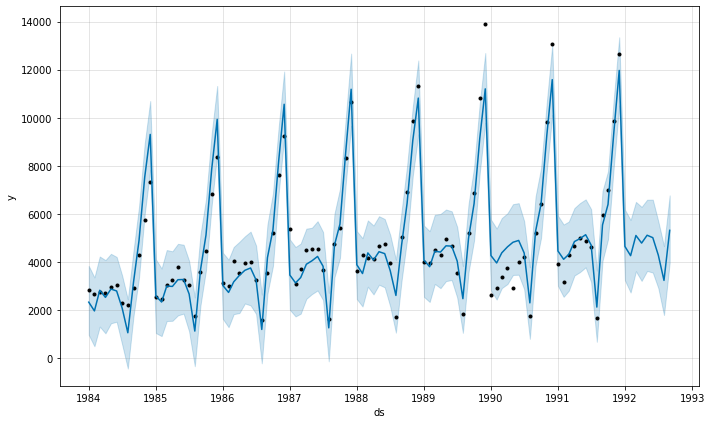

In [ ]:
fig = prophet.plot(forecast)

In [ ]:
plot_plotly(prophet,forecast)

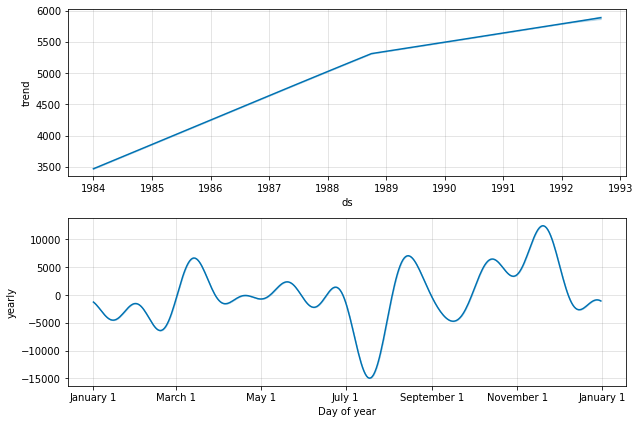

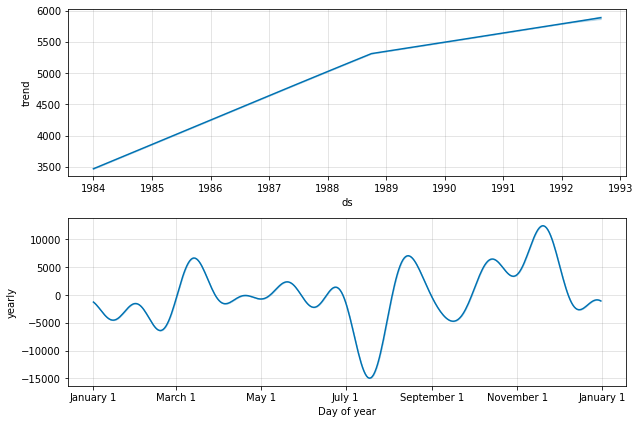

In [ ]:
prophet.plot_components(forecast)

In [ ]:
mape(df.Sales,forecast.yhat)

13.401738064772747

#Difference

In [ ]:
def difference(dataset, interval=1):
	diff = list()
	for i in np.arange(interval, len(dataset)):
		value = (dataset[i] - dataset[i - interval])
		diff.append(value)
	return pd.Series(diff)

In [ ]:
df_series = pd.Series(df.Sales)
diff_sales = pd.DataFrame(difference(df_series))

In [ ]:
diff_sales

,0
0,-143
1,83
2,-34
3,225
4,90
...,...
99,-170
100,694
101,-1014
102,-2885


In [ ]:
dates = pd.DataFrame(df.Month[:104])
dates

,Month
0,1984-01-01
1,1984-02-01
2,1984-03-01
3,1984-04-01
4,1984-05-01
...,...
99,1992-04-01
100,1992-05-01
101,1992-06-01
102,1992-07-01


In [ ]:
df_difference = pd.concat([dates,diff_sales],axis=1)

In [ ]:
df_difference.columns=['ds','y']

In [ ]:
df_difference

,ds,y
0,1984-01-01,-143
1,1984-02-01,83
2,1984-03-01,-34
3,1984-04-01,225
4,1984-05-01,90
...,...,...
99,1992-04-01,-170
100,1992-05-01,694
101,1992-06-01,-1014
102,1992-07-01,-2885


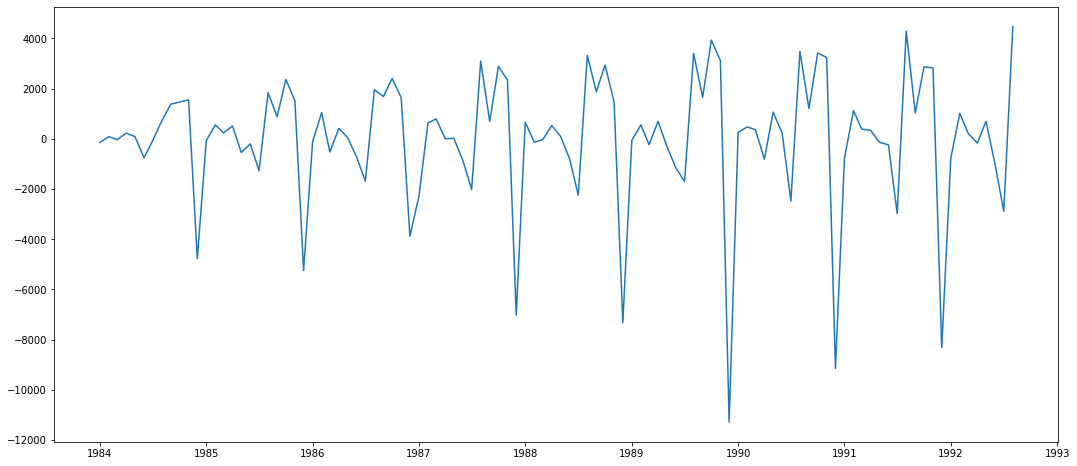

In [ ]:
plt.plot(df_difference.ds, df_difference.y)

In [ ]:
df_difference.tail(10)

,ds,y
94,1991-11-01,2819
95,1991-12-01,-8322
96,1992-01-01,-784
97,1992-02-01,1013
98,1992-03-01,211
99,1992-04-01,-170
100,1992-05-01,694
101,1992-06-01,-1014
102,1992-07-01,-2885
103,1992-08-01,4464


In [ ]:
train_diff = df_difference[:96]
test_diff = df_difference[-8:]

In [ ]:
test_diff.shape

(8, 2)

In [ ]:
future_diff = prophet.make_future_dataframe(periods=8, freq='MS')
prophet_diff = Prophet(
  interval_width = 0.95,
  yearly_seasonality = True,
  weekly_seasonality = False,
  daily_seasonality = False,
  holidays = None,
  changepoint_prior_scale = 0.17
)
prophet_diff.fit(train_diff)
forecast_diff = prophet.predict(future_diff)
print(f'Train mape: {mape(train_diff.y,forecast_diff.yhat[:96])}, \nTest mape:  {mape(test_diff.y,forecast_diff.yhat[-8:])}')

Train mape: 1968.6567520898, 
Test mape:  969.2075884573395


In [ ]:
for scale in np.arange(0.001,1,0.05):
  prophet_diff = Prophet(
  interval_width = 0.95,
  yearly_seasonality = True,
  weekly_seasonality = False,
  daily_seasonality = False,
  holidays = None,
  changepoint_prior_scale = scale
  )
  prophet_diff.fit(train_diff)
  forecast_diff = prophet.predict(future_diff)
  print(f'Scale: {scale} \nTrain mape: {mape(train_diff.y,forecast_diff.yhat[:96])}, \nTest mape:  {mape(test_diff.y,forecast_diff.yhat[-8:])}')
  print('='*30)

Scale: 0.001 
Train mape: 1968.6567520898, 
Test mape:  969.2075884573395
Scale: 0.051000000000000004 
Train mape: 1968.6567520898, 
Test mape:  969.2075884573395
Scale: 0.101 
Train mape: 1968.6567520898, 
Test mape:  969.2075884573395
Scale: 0.15100000000000002 
Train mape: 1968.6567520898, 
Test mape:  969.2075884573395
Scale: 0.201 
Train mape: 1968.6567520898, 
Test mape:  969.2075884573395
Scale: 0.251 
Train mape: 1968.6567520898, 
Test mape:  969.2075884573395
Scale: 0.30100000000000005 
Train mape: 1968.6567520898, 
Test mape:  969.2075884573395
Scale: 0.35100000000000003 
Train mape: 1968.6567520898, 
Test mape:  969.2075884573395
Scale: 0.401 
Train mape: 1968.6567520898, 
Test mape:  969.2075884573395
Scale: 0.451 
Train mape: 1968.6567520898, 
Test mape:  969.2075884573395
Scale: 0.501 
Train mape: 1968.6567520898, 
Test mape:  969.2075884573395
Scale: 0.551 
Train mape: 1968.6567520898, 
Test mape:  969.2075884573395
Scale: 0.6010000000000001 
Train mape: 1968.6567520898,

In [ ]:
forecast_diff

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,1984-01-01,3469.069230,848.631618,3811.574000,3469.069230,3469.069230,-1141.299517,-1141.299517,-1141.299517,-1141.299517,-1141.299517,-1141.299517,0.0,0.0,0.0,2327.769713
1,1984-02-01,3502.081057,544.670186,3411.272475,3502.081057,3502.081057,-1538.585781,-1538.585781,-1538.585781,-1538.585781,-1538.585781,-1538.585781,0.0,0.0,0.0,1963.495276
2,1984-03-01,3532.963090,1375.992763,4272.286780,3532.963090,3532.963090,-710.885792,-710.885792,-710.885792,-710.885792,-710.885792,-710.885792,0.0,0.0,0.0,2822.077298
3,1984-04-01,3565.974917,1089.654433,3997.978114,3565.974917,3565.974917,-1038.854862,-1038.854862,-1038.854862,-1038.854862,-1038.854862,-1038.854862,0.0,0.0,0.0,2527.120055
4,1984-05-01,3597.921847,1377.163006,4340.959104,3597.921847,3597.921847,-724.741092,-724.741092,-724.741092,-724.741092,-724.741092,-724.741092,0.0,0.0,0.0,2873.180755
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99,1992-04-01,5825.007563,3183.839079,6348.249698,5817.801332,5831.701251,-1038.854862,-1038.854862,-1038.854862,-1038.854862,-1038.854862,-1038.854862,0.0,0.0,0.0,4786.152700
100,1992-05-01,5837.071518,3504.676924,6754.547826,5827.618973,5846.241007,-724.741092,-724.741092,-724.741092,-724.741092,-724.741092,-724.741092,0.0,0.0,0.0,5112.330426
101,1992-06-01,5849.537604,3677.741566,6465.717635,5837.080108,5860.749464,-838.016808,-838.016808,-838.016808,-838.016808,-838.016808,-838.016808,0.0,0.0,0.0,5011.520796
102,1992-07-01,5861.601559,2808.606804,5597.669750,5845.755254,5875.049339,-1578.187454,-1578.187454,-1578.187454,-1578.187454,-1578.187454,-1578.187454,0.0,0.0,0.0,4283.414105


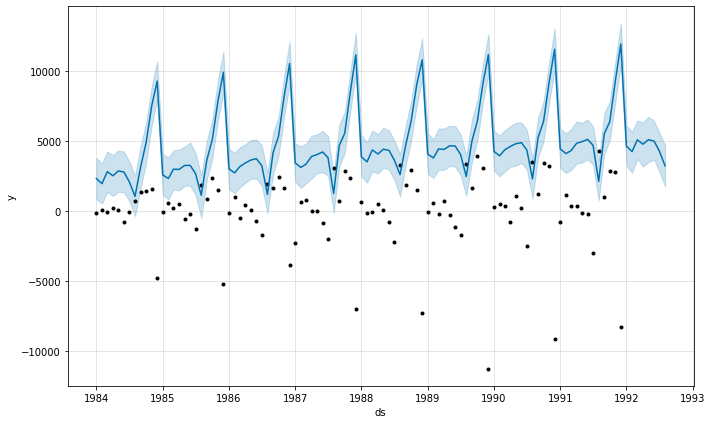

In [ ]:
fig = prophet_diff.plot(forecast_diff)

In [ ]:
np.argmin(train_diff.y)

71

In [ ]:
train_diff.y[71] = np.mean(train_diff)

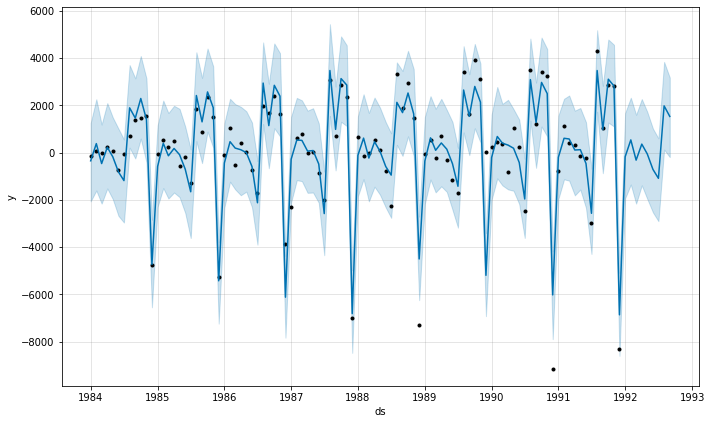

In [ ]:
prophet_diff1 = Prophet(
  interval_width = 0.95,
  yearly_seasonality = True,
  weekly_seasonality = False,
  daily_seasonality = False,
  holidays = None,
  changepoint_prior_scale = 0.17
)
prophet_diff1.fit(train_diff)
forecast_diff1 = prophet_diff1.predict(future)
fig = prophet_diff1.plot(forecast_diff1)

In [ ]:
mape(train_diff.y,forecast_diff1.yhat)

485.78126471130787

In [ ]:
train_diff[70:85]

,ds,y
70,1989-11-01,3113
71,1989-12-01,15
72,1990-01-01,260
73,1990-02-01,471
74,1990-03-01,370
75,1990-04-01,-813
76,1990-05-01,1059
77,1990-06-01,231
78,1990-07-01,-2479
79,1990-08-01,3483


In [ ]:
forecast_diff1.yhat[70:85]

70    2139.665013
71   -5193.417231
72    -205.666220
73     684.055798
74     402.802469
75     319.333214
76     187.195154
77    -416.107613
78   -1962.250713
79    3093.218505
80    1279.051054
81    2974.032104
82    2501.855942
83   -6022.331715
84    -195.817712
Name: yhat, dtype: float64

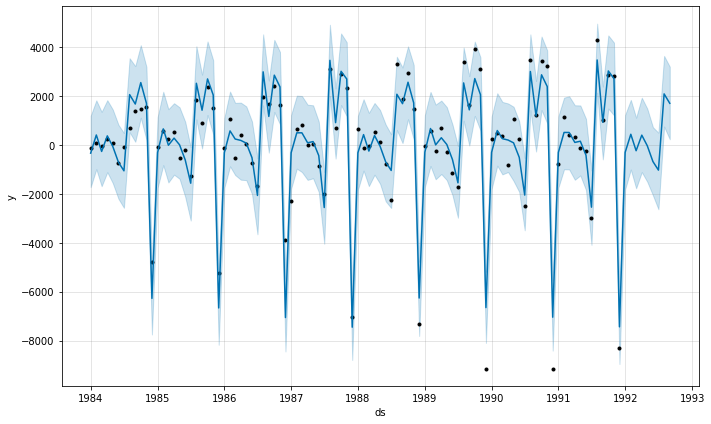

In [ ]:
train_diff.y[71] = train_diff.y[83]
prophet_diff2 = Prophet(
  interval_width = 0.95,
  yearly_seasonality = True,
  weekly_seasonality = False,
  daily_seasonality = False,
  holidays = None,
  changepoint_prior_scale = 0.17
)
prophet_diff2.fit(train_diff)
forecast_diff2 = prophet_diff2.predict(future)
fig = prophet_diff2.plot(forecast_diff2)

In [ ]:
mape(train_diff.y,forecast_diff2.yhat)

116.14989764932572

In [ ]:
import statsmodels.api as sm
def kpss_test(series, **kw):    
    statistic, p_value, n_lags, critical_values = sm.tsa.stattools.kpss(series, **kw)
    # Format Output
    print(f'KPSS Statistic: {statistic}')
    print(f'p-value: {p_value}')
    print(f'num lags: {n_lags}')
    print('Critial Values:')
    for key, value in critical_values.items():
        print(f'   {key} : {value}')
    print(f'Result: The series is {"not " if p_value < 0.05 else ""}stationary')

In [ ]:
kpss_test(train.Sales)

KPSS Statistic: 0.8141124992339631
p-value: 0.01
num lags: 12
Critial Values:
   10% : 0.347
   5% : 0.463
   2.5% : 0.574
   1% : 0.739
Result: The series is not stationary


In [ ]:
kpss_test(train_diff.y)

KPSS Statistic: 0.11557163804208088
p-value: 0.1
num lags: 12
Critial Values:
   10% : 0.347
   5% : 0.463
   2.5% : 0.574
   1% : 0.739
Result: The series is stationary


#Cross Validation

In [ ]:
from fbprophet.diagnostics import cross_validation
#df_cv = cross_validation(prophet, initial)

In [ ]:
prophet = Prophet(
  interval_width = 0.95,
  seasonality_prior_scale = 40,
  yearly_seasonality = True,
  weekly_seasonality = False,
  daily_seasonality = False,
  holidays = None,
  changepoint_prior_scale = 0.17
)
prophet.fit(train_new)
forecast = prophet.predict(future)
print(f'Train mape: {mape(df.Sales[:96],forecast.yhat[:96])}, \nTest mape:  {mape(df.Sales[-9:],forecast.yhat[-9:])}')

Train mape: 12.647337512596454, 
Test mape:  21.44867728798653


In [ ]:
df_cv = cross_validation(prophet, horizon='240 days', period='120 days', initial='480 days', parallel='threads')
df_cv

INFO:fbprophet:Making 19 forecasts with cutoffs between 1985-05-06 00:00:00 and 1991-04-05 00:00:00
INFO:fbprophet:Applying in parallel with <concurrent.futures.thread.ThreadPoolExecutor object at 0x7f4bacfdb2d0>
INFO:fbprophet:n_changepoints greater than number of observations. Using 12.
INFO:fbprophet:n_changepoints greater than number of observations. Using 22.
INFO:fbprophet:n_changepoints greater than number of observations. Using 15.
INFO:fbprophet:n_changepoints greater than number of observations. Using 19.
INFO:fbprophet:n_changepoints greater than number of observations. Using 24.


,ds,yhat,yhat_lower,yhat_upper,y,cutoff
0,1985-06-01,93.788333,79.798667,107.755212,3230,1985-05-06
1,1985-07-01,3946.385101,3907.836507,3983.942622,3028,1985-05-06
2,1985-08-01,4816.579700,4748.725257,4885.003193,1759,1985-05-06
3,1985-09-01,5041.292583,4932.930883,5152.358578,3595,1985-05-06
4,1985-10-01,3192.019961,3052.220505,3353.776309,4474,1985-05-06
...,...,...,...,...,...,...
145,1991-08-01,2144.670939,600.768171,3710.331189,1659,1991-04-05
146,1991-09-01,5159.066275,3611.725399,6622.101759,5951,1991-04-05
147,1991-10-01,5967.101840,4531.970675,7363.972001,6981,1991-04-05
148,1991-11-01,8965.511323,7433.586736,10537.238201,9851,1991-04-05


In [ ]:
from fbprophet.diagnostics import performance_metrics
df_p = performance_metrics(df_cv)
df_p

,horizon,mse,rmse,mae,mape,mdape,coverage
0,26 days,2.049328e+06,1431.547373,1102.314742,0.308206,0.132688,0.600000
1,28 days,3.424256e+06,1850.474657,1338.155390,0.363239,0.132688,0.566667
2,31 days,3.381792e+06,1838.964907,1339.137674,0.371400,0.172136,0.466667
3,33 days,3.341490e+06,1827.974153,1318.851041,0.361142,0.161423,0.466667
4,36 days,3.347815e+06,1829.703472,1330.856627,0.367272,0.161423,0.400000
...,...,...,...,...,...,...,...
99,233 days,3.094448e+06,1759.104454,1427.923138,0.459449,0.229303,0.333333
100,235 days,2.893904e+06,1701.147726,1411.688642,0.432017,0.156031,0.300000
101,236 days,2.441425e+06,1562.506011,1300.729350,0.403013,0.156031,0.333333
102,238 days,2.278791e+06,1509.566360,1237.184189,0.360851,0.156031,0.400000


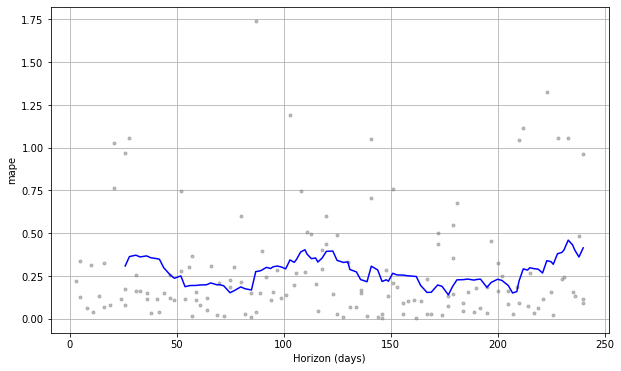

In [ ]:
from fbprophet.plot import plot_cross_validation_metric
fig = plot_cross_validation_metric(df_cv, metric='mape')

#Exogenous Variable

In [ ]:
weather = [1,1,1,1,2,2,2,2,3,3,3,3]*8
weather = weather + [1,1,1,1,2,2,2,2,3]

In [ ]:
105/12

8.75

In [ ]:
df_exo = df.copy()
df_exo['weather_type'] = weather
df_exo.rename(columns={'Month':'ds'},inplace=True)
df_exo.head(12)

,ds,Sales,weather_type
0,1984-01-01,2815,1
1,1984-02-01,2672,1
2,1984-03-01,2755,1
3,1984-04-01,2721,1
4,1984-05-01,2946,2
5,1984-06-01,3036,2
6,1984-07-01,2282,2
7,1984-08-01,2212,2
8,1984-09-01,2922,3
9,1984-10-01,4301,3


In [ ]:
df_exo = df_exo.rename(columns={'Month':'ds', 'Sales':'y'})
df_exo.head()

,ds,y,weather_type
0,1984-01-01,2815,1
1,1984-02-01,2672,1
2,1984-03-01,2755,1
3,1984-04-01,2721,1
4,1984-05-01,2946,2


In [ ]:
train_exo = df_exo[:96]
test_exo  = df_exo[-9:]

In [ ]:
prophet = Prophet(
  interval_width = 0.95,
  seasonality_prior_scale = 40,
  yearly_seasonality = True,
  weekly_seasonality = False,
  daily_seasonality = False,
  holidays = None,
  changepoint_prior_scale = 0.17
)
prophet.add_regressor('weather_type')
prophet.fit(train_exo)
future = prophet.make_future_dataframe(periods=9, freq='MS')
future['weather_type'] = weather
forecast_exo = prophet.predict(future)

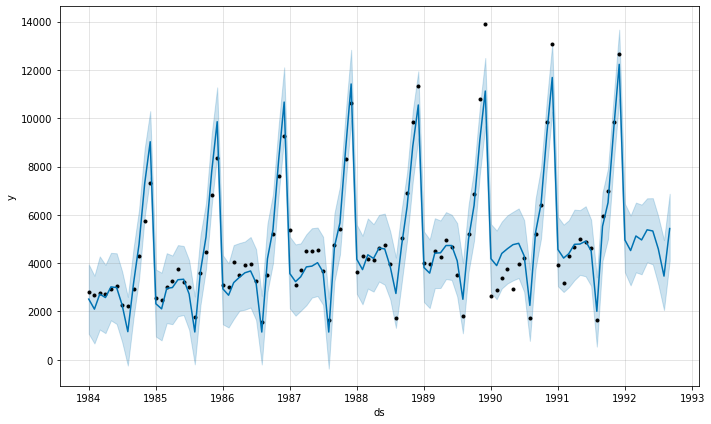

In [ ]:
fig = m.plot(forecast_exo)

In [ ]:
mape(df.Sales[:96],forecast_exo.yhat[:96])

12.616840034644747

In [ ]:
mape(df.Sales[-9:],forecast_exo.yhat[-9:])

25.9001680949991

In [ ]:
for scale in np.arange(0.5,5,0.5):
  prophet = Prophet(
    interval_width = 0.95,
    seasonality_prior_scale = 40,
    yearly_seasonality = True,
    weekly_seasonality = False,
    daily_seasonality = False,
    holidays = None,
    changepoint_prior_scale = scale
  )
  prophet.add_regressor('weather_type')
  prophet.fit(train_exo)
  future = prophet.make_future_dataframe(periods=9, freq='MS')
  future['weather_type'] = weather
  forecast_exo = prophet.predict(future)

  print(f'Scale: {scale} \nTrain mape:{mape(df.Sales[:96],forecast_exo.yhat[:96])} \nTest mape:{mape(df.Sales[-9:],forecast_exo.yhat[-9:])} ')
  print('='*30)

Scale: 0.5 
Train mape:11.814171987448265 
Test mape:33.00372262795976 
Scale: 1.0 
Train mape:11.519011554505372 
Test mape:39.30126289944418 
Scale: 1.5 
Train mape:11.384577531708045 
Test mape:41.44705907406034 
Scale: 2.0 
Train mape:10.941687063254346 
Test mape:44.34795255192194 
Scale: 2.5 
Train mape:10.514045569189717 
Test mape:46.07264422691044 
Scale: 3.0 
Train mape:10.332797107813496 
Test mape:45.52223893489811 
Scale: 3.5 
Train mape:10.296304565737994 
Test mape:44.959329050851494 
Scale: 4.0 
Train mape:10.295648255889576 
Test mape:44.60478400601168 
Scale: 4.5 
Train mape:10.301849359592142 
Test mape:44.32914104374492 


In [ ]:
for scale in np.arange(0.05,1.55,0.05):
  prophet = Prophet(
    interval_width = 0.95,
    seasonality_prior_scale = 40,
    yearly_seasonality = True,
    weekly_seasonality = False,
    daily_seasonality = False,
    holidays = None,
    changepoint_prior_scale = scale
  )
  prophet.add_regressor('weather_type')
  prophet.fit(train_exo)
  future = prophet.make_future_dataframe(periods=9, freq='MS')
  future['weather_type'] = weather
  forecast_exo = prophet.predict(future)

  print(f'Scale: {scale} \nTrain mape:{mape(df.Sales[:96],forecast_exo.yhat[:96])} \nTest mape:{mape(df.Sales[-9:],forecast_exo.yhat[-9:])} ')
  print('='*30)

Scale: 0.05 
Train mape:12.853473397660723 
Test mape:30.63063320574922 
Scale: 0.1 
Train mape:12.670766637679204 
Test mape:26.803864254355087 
Scale: 0.15000000000000002 
Train mape:12.61236140187719 
Test mape:27.233877323641696 
Scale: 0.2 
Train mape:12.624212626843223 
Test mape:25.657910158099728 
Scale: 0.25 
Train mape:12.321911336976111 
Test mape:28.98889765495326 
Scale: 0.3 
Train mape:12.194077347101745 
Test mape:31.022227243158223 
Scale: 0.35000000000000003 
Train mape:12.042376721756622 
Test mape:31.796111866470255 
Scale: 0.4 
Train mape:11.976486693597966 
Test mape:32.52297469345331 
Scale: 0.45 
Train mape:11.864436945934779 
Test mape:32.62339226741294 
Scale: 0.5 
Train mape:11.814171987448265 
Test mape:33.00372262795976 
Scale: 0.55 
Train mape:11.732057472631874 
Test mape:34.45737400479796 
Scale: 0.6000000000000001 
Train mape:11.681335526348015 
Test mape:35.37501379716252 
Scale: 0.6500000000000001 
Train mape:11.64296654085611 
Test mape:36.19395537655

In [ ]:
for scale in np.arange(0.1,0.251,0.01):
  prophet = Prophet(
    interval_width = 0.95,
    seasonality_prior_scale = 40,
    yearly_seasonality = True,
    weekly_seasonality = False,
    daily_seasonality = False,
    holidays = None,
    changepoint_prior_scale = scale
  )
  prophet.add_regressor('weather_type')
  prophet.fit(train_exo)
  future = prophet.make_future_dataframe(periods=9, freq='MS')
  future['weather_type'] = weather
  forecast_exo = prophet.predict(future)

  print(f'Scale: {scale} \nTrain mape:{mape(df.Sales[:96],forecast_exo.yhat[:96])} \nTest mape:{mape(df.Sales[-9:],forecast_exo.yhat[-9:])} ')
  print('='*30)

Scale: 0.1 
Train mape:12.670766637679204 
Test mape:26.803864254355087 
Scale: 0.11 
Train mape:12.632882457484337 
Test mape:26.960066634500347 
Scale: 0.12 
Train mape:12.625587751307776 
Test mape:26.722133684860864 
Scale: 0.13 
Train mape:12.639751187168317 
Test mape:26.913906634398565 
Scale: 0.13999999999999999 
Train mape:12.610393813082647 
Test mape:26.28342036111376 
Scale: 0.14999999999999997 
Train mape:12.61236082050863 
Test mape:27.23387906124344 
Scale: 0.15999999999999998 
Train mape:12.611818607380568 
Test mape:26.595735631600142 
Scale: 0.16999999999999998 
Train mape:12.616840015041959 
Test mape:25.900168652087242 
Scale: 0.17999999999999997 
Train mape:12.614135956328711 
Test mape:25.9409380669836 
Scale: 0.18999999999999995 
Train mape:12.595736134320065 
Test mape:26.089122237031425 
Scale: 0.19999999999999996 
Train mape:12.6242126093215 
Test mape:25.657909931130966 
Scale: 0.20999999999999996 
Train mape:12.466291337114443 
Test mape:27.219794037849738 


In [ ]:
for scale in np.arange(0.5,5,0.5):
  prophet = Prophet(
    interval_width = 0.95,
    seasonality_prior_scale = 40,
    yearly_seasonality = True,
    weekly_seasonality = False,
    daily_seasonality = False,
    holidays = None,
    changepoint_prior_scale = 0.18
  )
  prophet.add_regressor('weather_type')
  prophet.fit(train_exo)
  future = prophet.make_future_dataframe(periods=9, freq='MS')
  future['weather_type'] = weather
  forecast_exo = prophet.predict(future)

  print(f'Scale: {scale} \nTrain mape:{mape(df.Sales[:96],forecast_exo.yhat[:96])} \nTest mape:{mape(df.Sales[-9:],forecast_exo.yhat[-9:])} ')
  print('='*30)

Scale: 0.5 
Train mape:12.614135943767197 
Test mape:25.940939447630722 
Scale: 1.0 
Train mape:12.614135943767197 
Test mape:25.940939447630722 
Scale: 1.5 
Train mape:12.614135943767197 
Test mape:25.940939447630722 
Scale: 2.0 
Train mape:12.614135943767197 
Test mape:25.940939447630722 
Scale: 2.5 
Train mape:12.614135943767197 
Test mape:25.940939447630722 
Scale: 3.0 
Train mape:12.614135943767197 
Test mape:25.940939447630722 
Scale: 3.5 
Train mape:12.614135943767197 
Test mape:25.940939447630722 
Scale: 4.0 
Train mape:12.614135943767197 
Test mape:25.940939447630722 
Scale: 4.5 
Train mape:12.614135943767197 
Test mape:25.940939447630722 


In [ ]:
prophet = Prophet(
  interval_width = 0.95,
  seasonality_prior_scale = 5,
  yearly_seasonality = True,
  weekly_seasonality = False,
  daily_seasonality = False,
  holidays = None,
  changepoint_prior_scale = 0.18
)
prophet.add_regressor('weather_type')
prophet.fit(train_exo)
future = prophet.make_future_dataframe(periods=9, freq='MS')
future['weather_type'] = weather
forecast_exo = prophet.predict(future)
print(f'Train mape:{mape(df.Sales[:96],forecast_exo.yhat[:96])} \nTest mape:{mape(df.Sales[-9:],forecast_exo.yhat[-9:])} ')
  

Train mape:12.581576978707812 
Test mape:25.483530914598244 


In [ ]:
for scale in np.arange(5,151,5):
  prophet = Prophet(
    interval_width = 0.95,
    seasonality_prior_scale = scale,
    yearly_seasonality = True,
    weekly_seasonality = False,
    daily_seasonality = False,
    holidays = None,
    changepoint_prior_scale = 0.18
  )
  prophet.add_regressor('weather_type')
  prophet.fit(train_exo)
  future = prophet.make_future_dataframe(periods=9, freq='MS')
  future['weather_type'] = weather
  forecast_exo = prophet.predict(future)

  print(f'Scale: {scale} \nTrain mape:{mape(df.Sales[:96],forecast_exo.yhat[:96])} \nTest mape:{mape(df.Sales[-9:],forecast_exo.yhat[-9:])} ')
  print('='*30)

Scale: 5 
Train mape:12.581576978707812 
Test mape:25.483530914598244 
Scale: 10 
Train mape:12.606197230973363 
Test mape:25.5771986096203 
Scale: 15 
Train mape:12.612393643353858 
Test mape:25.717692918042808 
Scale: 20 
Train mape:12.6119014029956 
Test mape:25.827290835690608 
Scale: 25 
Train mape:12.610652631639871 
Test mape:25.753758959180857 
Scale: 30 
Train mape:12.632140204186815 
Test mape:26.06070125985809 
Scale: 35 
Train mape:12.617393977525223 
Test mape:26.125733612224238 
Scale: 40 
Train mape:12.614135943767197 
Test mape:25.940939447630722 
Scale: 45 
Train mape:12.615278619286949 
Test mape:25.8497279849533 
Scale: 50 
Train mape:12.61799374206288 
Test mape:25.73669959157643 
Scale: 55 
Train mape:12.627813386941286 
Test mape:25.866471282051307 
Scale: 60 
Train mape:12.627936937685904 
Test mape:25.78805314175707 
Scale: 65 
Train mape:12.63338737830055 
Test mape:25.830684344452497 
Scale: 70 
Train mape:12.638518285207983 
Test mape:25.864727322698567 
Scal

In [ ]:
for scale in np.arange(0.5,5,0.5):
  prophet = Prophet(
    interval_width = 0.95,
    seasonality_prior_scale = scale,
    yearly_seasonality = True,
    weekly_seasonality = False,
    daily_seasonality = False,
    holidays = None,
    changepoint_prior_scale = 0.18
  )
  prophet.add_regressor('weather_type')
  prophet.fit(train_exo)
  future = prophet.make_future_dataframe(periods=9, freq='MS')
  future['weather_type'] = weather
  forecast_exo = prophet.predict(future)

  print(f'Scale: {scale} \nTrain mape:{mape(df.Sales[:96],forecast_exo.yhat[:96])} \nTest mape:{mape(df.Sales[-9:],forecast_exo.yhat[-9:])} ')
  print('='*30)

Scale: 0.5 
Train mape:12.545681813485418 
Test mape:21.643276417989547 
Scale: 1.0 
Train mape:12.526223506907453 
Test mape:21.92230041297782 
Scale: 1.5 
Train mape:12.5098822565266 
Test mape:22.944882511498932 
Scale: 2.0 
Train mape:12.516933596508142 
Test mape:23.544679503006616 
Scale: 2.5 
Train mape:12.535854158961888 
Test mape:23.993521222701172 
Scale: 3.0 
Train mape:12.539908903627097 
Test mape:24.78897443571128 
Scale: 3.5 
Train mape:12.557776965549952 
Test mape:24.726052676054827 
Scale: 4.0 
Train mape:12.564197112401496 
Test mape:24.922092551162656 
Scale: 4.5 
Train mape:12.577272950583977 
Test mape:25.057949734604595 


In [ ]:
for scale in np.arange(0.01,1,0.05):
  prophet = Prophet(
    interval_width = 0.95,
    seasonality_prior_scale = scale,
    yearly_seasonality = True,
    weekly_seasonality = False,
    daily_seasonality = False,
    holidays = None,
    changepoint_prior_scale = 0.18
  )
  prophet.add_regressor('weather_type')
  prophet.fit(train_exo)
  future = prophet.make_future_dataframe(periods=9, freq='MS')
  future['weather_type'] = weather
  forecast_exo = prophet.predict(future)

  print(f'Scale: {scale} \nTrain mape:{mape(df.Sales[:96],forecast_exo.yhat[:96])} \nTest mape:{mape(df.Sales[-9:],forecast_exo.yhat[-9:])} ')
  print('='*30)

Scale: 0.01 
Train mape:25.480031091238153 
Test mape:38.39356945902924 
Scale: 0.060000000000000005 
Train mape:12.714026905026252 
Test mape:17.981934922464557 
Scale: 0.11 
Train mape:12.522764352811352 
Test mape:18.78271220783757 
Scale: 0.16000000000000003 
Train mape:12.461650627275528 
Test mape:19.104682683257682 
Scale: 0.21000000000000002 
Train mape:12.475673786319202 
Test mape:19.487340997379405 
Scale: 0.26 
Train mape:12.468786434023436 
Test mape:20.5031781846186 
Scale: 0.31000000000000005 
Train mape:12.502577751318286 
Test mape:20.81665554971402 
Scale: 0.36000000000000004 
Train mape:12.517083415590886 
Test mape:20.43730979832354 
Scale: 0.41000000000000003 
Train mape:12.522574290730212 
Test mape:20.892526176974936 
Scale: 0.46 
Train mape:12.540953603852431 
Test mape:20.821845990531145 
Scale: 0.51 
Train mape:12.534909949243685 
Test mape:21.658780401743464 
Scale: 0.56 
Train mape:12.51975363356561 
Test mape:21.679618009506875 
Scale: 0.6100000000000001 
T

Train mape:12.712060505009312 
Test mape:18.121023680504145 


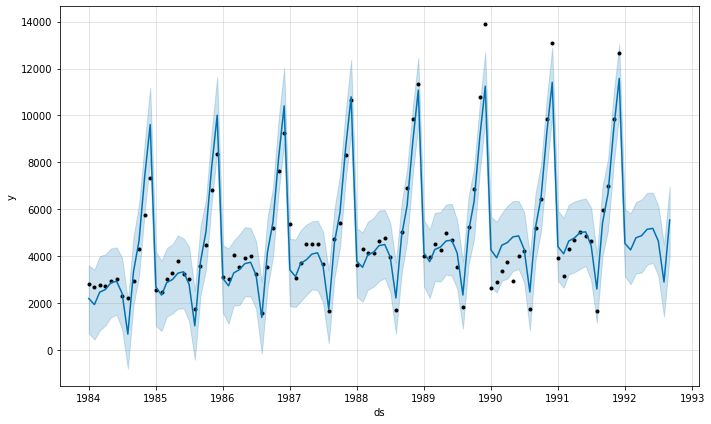

In [ ]:
prophet = Prophet(
  interval_width = 0.95,
  seasonality_prior_scale = 0.06,
  yearly_seasonality = True,
  weekly_seasonality = False,
  daily_seasonality = False,
  holidays = None,
  changepoint_prior_scale = 0.17
)
prophet.add_regressor('weather_type')
prophet.fit(train_exo)
future = prophet.make_future_dataframe(periods=9, freq='MS')
future['weather_type'] = weather
forecast_exo = prophet.predict(future)
fig = m.plot(forecast_exo)
print(f'Train mape:{mape(train_exo.y,forecast_exo.yhat[:96])} \nTest mape:{mape(test_exo.y,forecast_exo.yhat[-9:])} ')

In [ ]:
for scale in np.arange(0.10,0.26,0.01):
  prophet = Prophet(
    interval_width = 0.95,
    seasonality_prior_scale = 0.06,
    yearly_seasonality = True,
    weekly_seasonality = False,
    daily_seasonality = False,
    holidays = None,
    changepoint_prior_scale = scale
  )
  prophet.add_regressor('weather_type')
  prophet.fit(train_exo)
  future = prophet.make_future_dataframe(periods=9, freq='MS')
  future['weather_type'] = weather
  forecast_exo = prophet.predict(future)

  print(f'Scale: {scale} \nTrain mape:{mape(train_exo.y,forecast_exo.yhat[:96])} \nTest mape:{mape(test_exo.y,forecast_exo.yhat[-9:])} ')
  print('='*30)

Scale: 0.1 
Train mape:12.721649239601005 
Test mape:19.143642557935223 
Scale: 0.11 
Train mape:12.717780855380969 
Test mape:19.137832569719148 
Scale: 0.12 
Train mape:12.728742874424379 
Test mape:18.32002732876289 
Scale: 0.13 
Train mape:12.7177036965521 
Test mape:18.64244613572903 
Scale: 0.13999999999999999 
Train mape:12.711365996018225 
Test mape:18.515585659282284 
Scale: 0.14999999999999997 
Train mape:12.709991523817077 
Test mape:18.353129572240253 
Scale: 0.15999999999999998 
Train mape:12.711218525864634 
Test mape:18.21716049783951 
Scale: 0.16999999999999998 
Train mape:12.712060505009315 
Test mape:18.121023680496585 
Scale: 0.17999999999999997 
Train mape:12.71402690502418 
Test mape:17.981934922478636 
Scale: 0.18999999999999995 
Train mape:12.728140514032846 
Test mape:17.46932683776289 
Scale: 0.19999999999999996 
Train mape:12.560713725551773 
Test mape:19.457646953778394 
Scale: 0.20999999999999996 
Train mape:12.546362737233437 
Test mape:19.64453511880528 
S

Train mape:12.728140514025405 
Test mape:17.46932683776269 


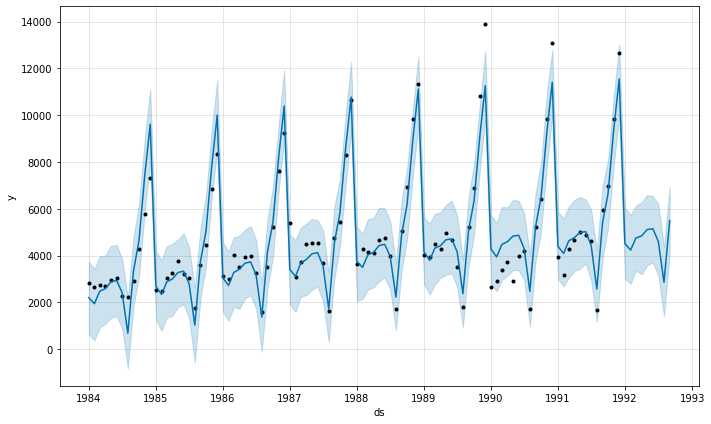

In [ ]:
prophet = Prophet(
  interval_width = 0.95,
  seasonality_prior_scale = 0.06,
  yearly_seasonality = True,
  weekly_seasonality = False,
  daily_seasonality = False,
  holidays = None,
  changepoint_prior_scale = 0.19
)
prophet.add_regressor('weather_type')
prophet.fit(train_exo)
future = prophet.make_future_dataframe(periods=9, freq='MS')
future['weather_type'] = weather
forecast_exo = prophet.predict(future)
fig = m.plot(forecast_exo)
print(f'Train mape:{mape(train_exo.y,forecast_exo.yhat[:96])} \nTest mape:{mape(test_exo.y,forecast_exo.yhat[-9:])} ')

Train mape:12.422022690185365 
Test mape:18.46014007949103 


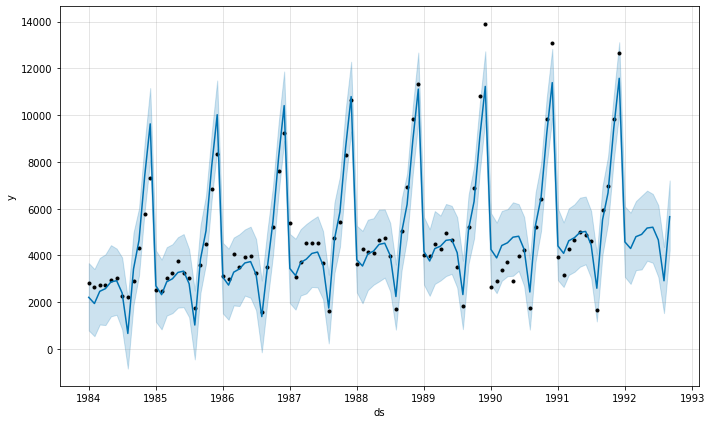

In [ ]:
prophet = Prophet(
  interval_width = 0.95,
  seasonality_prior_scale = 0.06,
  yearly_seasonality = True,
  weekly_seasonality = False,
  daily_seasonality = False,
  holidays = None,
  changepoint_prior_scale = 0.19
)
prophet.add_regressor('weather_type')
prophet.add_country_holidays(country_name='US')
prophet.fit(train_exo)
future = prophet.make_future_dataframe(periods=9, freq='MS')
future['weather_type'] = weather
forecast_exo = prophet.predict(future)
fig = m.plot(forecast_exo)
print(f'Train mape:{mape(train_exo.y,forecast_exo.yhat[:96])} \nTest mape:{mape(test_exo.y,forecast_exo.yhat[-9:])} ')

In [ ]:
mape(df_exo.y,forecast_exo.yhat)

12.939575609268708

#Step by Step Training

In [ ]:
train_exo = df_exo[:96]
test_exo  = df_exo[-9:]

In [ ]:
train_exo

,ds,y,weather_type
0,1984-01-01,2815,1
1,1984-02-01,2672,1
2,1984-03-01,2755,1
3,1984-04-01,2721,1
4,1984-05-01,2946,2
...,...,...,...
91,1991-08-01,1659,2
92,1991-09-01,5951,3
93,1991-10-01,6981,3
94,1991-11-01,9851,3


In [ ]:
for i in np.arange(8):
  prophet = Prophet(
    interval_width = 0.95,
    seasonality_prior_scale = 0.06,
    yearly_seasonality = True,
    weekly_seasonality = False,
    daily_seasonality = False,
    holidays = None,
    changepoint_prior_scale = 0.19
  )
  prophet.add_regressor('weather_type')
  prophet.add_country_holidays(country_name='US')


  prophet.fit(train_exo)
  future = prophet.make_future_dataframe(periods=1, freq='MS')
  future['weather_type'] = weather[:future.shape[0]]
  forecast_exo = prophet.predict(future)
  forecast_exo.rename(columns={'yhat':'y'}, inplace=True)
  train_exo = train_exo.append(forecast_exo[['ds','y']].iloc[-1])
  train_exo.weather_type = weather[:future.shape[0]] 

print(f'Train mape:{mape(train_exo.y,forecast_exo.y[:96])} \nTest mape:{mape(test_exo.y,forecast_exo.y[-9:])} ')

Train mape:12.361955135036528 
Test mape:20.3440730271923 
